In [90]:
from IPython.display import SVG, display

# Declaración de MACROS
base_board = '<svg x="0px" y="0px" width="500px" viewBox="0 0 300 300" style="enable-background:new 0 0 300 300;" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><symbol id="queen" viewBox="000 00 500 550"><path id="queen" d="M477.518 181.966a25 25 0 0 1-34.91 23l-62.29 150.26h-248.92l-62.24-150.19a25 25 0 1 1 9.73-7.29l87 71.2 20.92-126.4a25 25 0 1 1 14.7-1.85l54.31 117 54.42-117.3a25 25 0 1 1 14.58 2.08l20.93 126.42 87.26-71.3a25 25 0 1 1 44.51-15.63zm-71.66 241.25h-300v60h300v-60zm-27.75-52h-244.22v36h244.22v-36z"/></symbol>{}</svg>'
queens_example = [-1, -1, -1, -1, -1, -1, -1]

In [96]:
def display_board(queens):
    N_size = 300 / len(queens)
    board = base_board
    aux_board = ''
    for i in range(len(queens)):
        for j in range(len(queens)):
            aux_board += '<rect x="{}" y="{}" width="{}" height="{}" fill="{}"/>'.format(i*N_size, j*N_size, N_size, N_size, '#0f0f0f' if (i % 2 == 0 and j % 2 == 1) or (i % 2 == 1 and j % 2 == 0) else '#5c5b5b')
            # if queens[i] == j:
            #     aux_board += '<use xlink:href="#queen" x="{}" y="{}" width="{}" height="{}" fill="white"/>'.format(i*N_size, j*N_size, N_size, N_size)
    
    # Different color for collisions
    for i in range(len(queens)):
        collision = False
        if queens[i] >= 0 and queens[i] < len(queens):
            for j in range(len(queens)):
                if i != j:
                    if queens[j] == queens[i]:
                        print('in')
                        collision = True
                        aux_board += '<use xlink:href="#queen" x="{}" y="{}" width="{}" height="{}" fill="red"/>'.format(i*N_size, queens[i]*N_size, N_size, N_size)
                        break
                    elif abs(queens[j] - queens[i]) == abs(j - i):
                        collision = True
                        aux_board += '<use xlink:href="#queen" x="{}" y="{}" width="{}" height="{}" fill="red"/>'.format(i*N_size, queens[i]*N_size, N_size, N_size)
                        break
            if not collision:
                aux_board += '<use xlink:href="#queen" x="{}" y="{}" width="{}" height="{}" fill="white"/>'.format(i*N_size, queens[i]*N_size, N_size, N_size)


    board = board.format(aux_board)
    display(SVG(data=board))

in


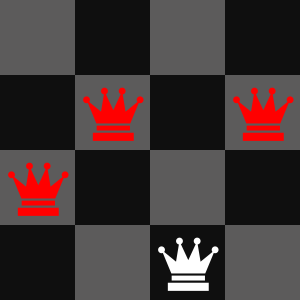

In [99]:
display_board([2, 1, 3, 1])